In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import lasio
import glob

In [173]:
well_api = 12_339_383
l = lasio.read(
    glob.glob(
        "F:/Geology/Post Graduate/well logs/" + str(well_api) + "/*.las"
    )[0]
)  # reads the well log .las file

In [174]:
from pprint import pprint

for curve in l.curves:
    print(
        "%s\t[%s]\t%s\t%s"
        % (curve.mnemonic, curve.unit, curve.value, curve.descr)
    )

DEPTH	[FT]		Measured Depth
GR	[API]		API corrected gamma counts at sensor depth.


In [175]:
gr = pd.Series(l["GR"]).fillna(value=0)
depth = pd.Series(l["DEPTh"]).fillna(value=0)

In [176]:
data2 = pd.read_excel(
    glob.glob(
        "F:/Geology/Post Graduate/well logs/" + str(well_api) + "/*.xlsm"
    )[0]
)
data2.columns = [
    "header",
    "measured depth",
    "inclination",
    "azimuth",
    "true vertical depth",
    "northing +N",
    "easting +E",
]
data2.head()
str(data2["header"][1])
str(data2["header"][5])

'Horsetail 02D-0204'

In [177]:
str(data2["header"][1])

'Whiting Oil and Gas'

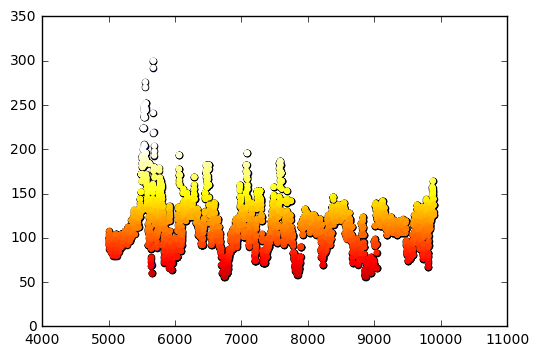

In [178]:
    depth=pd.Series(l['DEPTH'], name='measured depth').fillna(value=0)
    gr=pd.Series(l['GR'], name='gr').fillna(value=0)
    lwd=pd.DataFrame(pd.concat([depth, gr], axis=1))
    lwd.head()
    plt.scatter(lwd['measured depth'], lwd['gr'])
    shaded=gr/np.max(gr)
    plt.scatter(depth,gr, c=plt.cm.hot(shaded*1.5), edgecolors='none')


In [179]:
combined = pd.merge(data2, lwd, on="measured depth", how="outer")

In [180]:
sorteds = combined.sort_values(by="measured depth")
sorteds.index = range(1, len(sorteds) + 1)
interped = sorteds.interpolate().fillna(value=0)
interped.head()

,header,measured depth,inclination,azimuth,true vertical depth,northing +N,easting +E,gr
1,Operator Name,0.0,0.0,0.00,0.000,0.000,0.000,0.0
2,Whiting Oil and Gas,418.0,0.7,335.60,417.990,2.325,-1.055,0.0
3,Operator Number,788.0,1.6,353.30,787.912,9.514,-2.591,0.0
4,96155,1068.0,1.9,358.00,1067.781,18.035,-3.209,0.0
5,Well Name and Number,1254.0,2.0,0.32,1253.674,24.362,-3.299,0.0


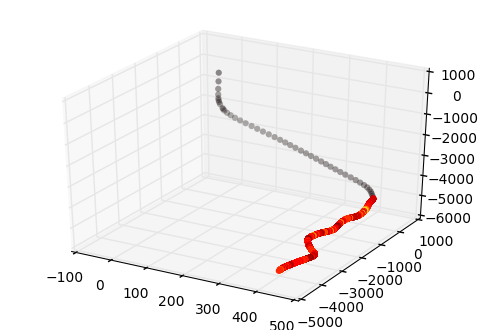

In [181]:
from mpl_toolkits.mplot3d import Axes3D

shaded = interped[[7]] / np.max(interped[[7]])
s2 = shaded.as_matrix().flatten()
threedee = plt.figure().gca(projection="3d")
threedee.scatter(
    interped[[6]],
    interped[[5]],
    -interped[[4]],
    c=plt.cm.hot(s2),
    edgecolors="none",
)

In [182]:
interped.head()

,header,measured depth,inclination,azimuth,true vertical depth,northing +N,easting +E,gr
1,Operator Name,0.0,0.0,0.00,0.000,0.000,0.000,0.0
2,Whiting Oil and Gas,418.0,0.7,335.60,417.990,2.325,-1.055,0.0
3,Operator Number,788.0,1.6,353.30,787.912,9.514,-2.591,0.0
4,96155,1068.0,1.9,358.00,1067.781,18.035,-3.209,0.0
5,Well Name and Number,1254.0,2.0,0.32,1253.674,24.362,-3.299,0.0


In [183]:
delta_tvd = []
delta_northing = []
delta_easting = []
delta_azimuth = []
delta_inclination = []
delta_gamma = []
gamma50a = []
gamma10a = []

for i in range(0, len(interped["measured depth"])):
    delta_tvd.append(interped.iloc[i, 4] - interped.iloc[i - 1, 4])
    delta_northing.append(interped.iloc[i, 5] - interped.iloc[i - 1, 5])
    delta_easting.append(interped.iloc[i, 6] - interped.iloc[i - 1, 6])
    delta_azimuth.append(interped.iloc[i, 3] - interped.iloc[i - 1, 3])
    delta_inclination.append(interped.iloc[i, 2] - interped.iloc[i - 1, 2])
    delta_gamma.append(interped.iloc[i, 7] - interped.iloc[i - 1, 7])

for i in range(0, len(interped["measured depth"]) - 50):
    gamma50a.append(interped.iloc[i + 50, 7])
for i in range(0, len(interped["measured depth"]) - 10):
    gamma10a.append(interped.iloc[i + 10, 7])


delta_tvd[0] = 0
delta_northing[0] = 0
delta_easting[0] = 0
delta_azimuth[0] = 0
delta_inclination[0] = 0
gamma50a[0] = 0
gamma10a[0] = 0
gr_class = []
gamma50 = []
gamma10 = []

for i in range(0, len(gamma50a)):
    gamma50.append(int(gamma50a[i]))
for i in range(0, len(delta_gamma)):
    gr_class.append(int(delta_gamma[i]))
for i in range(0, len(gamma10a)):
    gamma10.append(int(gamma10a[i]))

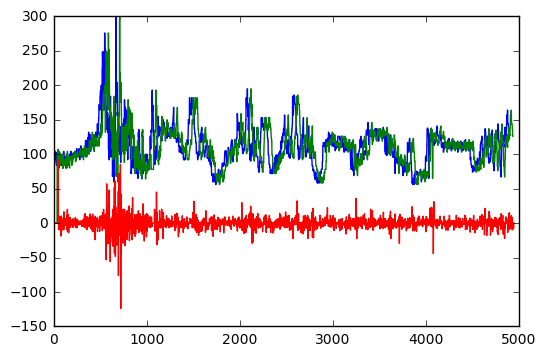

In [184]:
plt.plot(gamma50)
plt.plot(gamma10)
plt.plot(delta_gamma)
plt.show()

In [185]:
inclination_class = pd.DataFrame(interped["inclination"].round().astype(int))
azimuth_class = pd.DataFrame(interped["azimuth"].round().astype(int))

train0 = pd.DataFrame(
    {
        "measured depth": interped["measured depth"],
        "gamma ray": interped["gr"],
        "inclination": inclination_class["inclination"],
        "azimuth": azimuth_class["azimuth"],
        "dgr": gr_class,
        "dz": delta_tvd,
        "dy": delta_northing,
        "dx": delta_easting,
        "daz": delta_azimuth,
        "in": delta_inclination,
        "operator": str(data2["header"][1]),
        "well name": str(data2["header"][5]),
    }
)

In [186]:
gamma50DF = pd.DataFrame({"gamma50": gamma50})
gamma10DF = pd.DataFrame({"gamma10": gamma10})
train00 = pd.concat([gamma50DF, gamma10DF], axis=1)
train = pd.concat([train0, train00], axis=1).fillna(value=0)
# train.to_csv('F:/Geology/Post Graduate/well logs/training_data.csv', mode='w') #creates training data csv
# train.to_csv('F:/Geology/Post Graduate/well logs/training_data.csv', mode='a', header=False) #appends training data csv

In [100]:
X = train[["gamma ray"]]
y = train["inclination"]

This is the start of the machine learning portion

In [187]:
test_x = train[
    [
        "azimuth",
        "inclination",
        "dx",
        "dy",
        "dz",
        "daz",
        "in",
        "measured depth",
        "gamma ray",
        "gamma10",
        "dgr",
    ]
]
test_y = train["gamma50"]

In [202]:
from sklearn.cross_validation import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier


ranks = np.zeros(5)

clf = DecisionTreeClassifier(
    max_depth=None, min_samples_split=2, random_state=0
)
scores = cross_val_score(clf, test_x, test_y, cv=6)
ranks[0] = scores.mean()


clf = RandomForestClassifier(
    n_estimators=10, max_depth=None, min_samples_split=2, random_state=0
)
scores = cross_val_score(clf, test_x, test_y, cv=6)
ranks[1] = scores.mean()


clf = ExtraTreesClassifier(
    n_estimators=10, max_depth=None, min_samples_split=2, random_state=0
)
scores = cross_val_score(clf, test_x, test_y, cv=6)
ranks[2] = scores.mean()

clf = SVC()
scores = cross_val_score(clf, test_x, test_y, cv=6)
ranks[3] = scores.mean()

clf = BernoulliNB()
scores = cross_val_score(clf, test_x, test_y, cv=6)
ranks[4] = scores.mean()

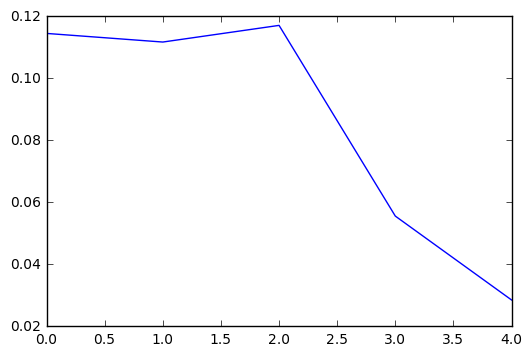

In [203]:
plt.plot(ranks)

In [78]:
max(ranks)

0.11711543546367975

In [170]:
all_wells = pd.read_csv(
    "F:/Geology/Post Graduate/well logs/training_data_clean.csv"
)
X = all_wells[
    [
        "azimuth",
        "inclination",
        "gamma ray",
        "dx",
        "dy",
        "dz",
        "daz",
        "in",
        "measured depth",
        "gamma10",
        "dgr",
    ]
]
Y_train = all_wells["gamma50"]

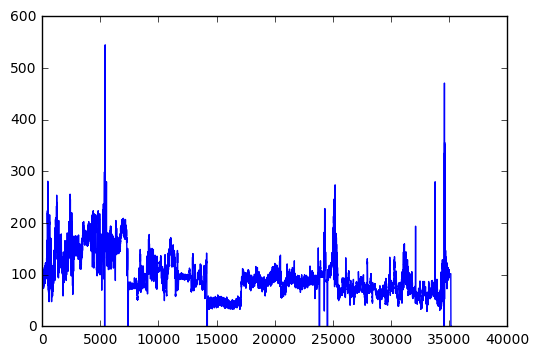

In [171]:
plt.plot(Y_train)

In [205]:
# clf = DecisionTreeClassifier(max_depth=None, min_samples_split=1,random_state=1)
clf = ExtraTreesClassifier(
    n_estimators=10, max_depth=None, min_samples_split=2, random_state=0
)
# clf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
# clf = SVC()
# clf = BernoulliNB()
# clf = KNeighborsClassifier(3),

clf.fit(X, Y_train, sample_weight=None)
clf.score(X, Y_train)

1.0

In [198]:
predictedgr = clf.predict(test_x)

0.034155214227970895

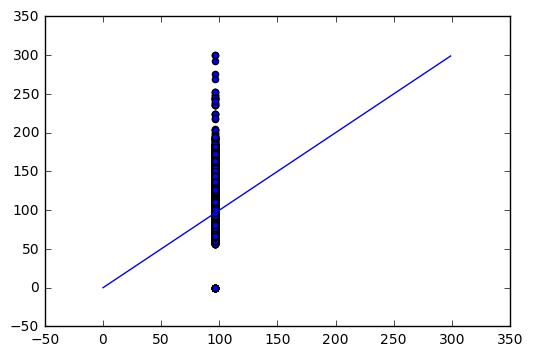

In [199]:
plt.scatter(predictedgr, test_y)
plt.plot(np.arange(0, 300))
clf.score(test_x, test_y)

In [ ]:
Y_train = []
for i in range(0, len(all_wells)):
    Y_train.append(int(all_wells["gamma ray"][i]))
validate_y = []
for i in range(1, len(test_y)):
    validate_y.append(int(test_y["gamma ray"][i]))